<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/ecommerce_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('ecommerce_sales.csv')
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])



Description      1454
CustomerID     135080
dtype: int64


In [ ]:
df = pd.DataFrame(data)
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
df = pd.DataFrame(data)
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


2.2

In [ ]:

data = data[(data['Quantity'] >= 0) & (data['UnitPrice'] >= 0)]

2.4

In [ ]:

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
df = pd.DataFrame(data)
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


3.1

In [ ]:
descriptive_stats = data.describe()
print(descriptive_stats)

            Quantity      UnitPrice     CustomerID     TotalPrice
count  392732.000000  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596   15287.734822      22.629195
std       181.588420      22.240725    1713.567773     311.083465
min         1.000000       0.000000   12346.000000       0.000000
25%         2.000000       1.250000   13955.000000       4.950000
50%         6.000000       1.950000   15150.000000      12.390000
75%        12.000000       3.750000   16791.000000      19.800000
max     80995.000000    8142.750000   18287.000000  168469.600000


3.2

In [ ]:
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [ ]:
top_products = data.groupby('Description')['Quantity'].sum().nlargest(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [ ]:

total_revenue = data['TotalPrice'].sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 8887208.894000003


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(2, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(7, 0, 'POPCORN HOLDER'),
  Text(8, 0, 'RABBIT NIGHT LIGHT'),
  Text(9, 0, 'MINI PAINT SET VINTAGE')])

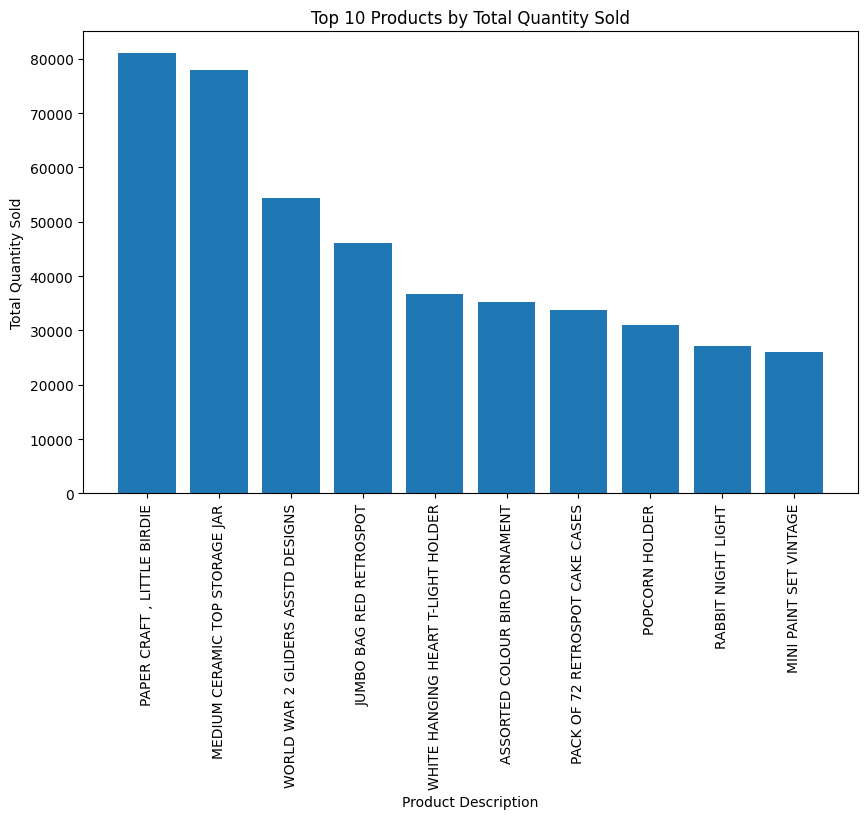

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_products.index, top_products.values)
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Total Quantity Sold')
plt.xticks(rotation=90)

In [ ]:
total_revenue = data['TotalPrice'].sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 8887208.894000003
